In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
import os
from PIL import Image
import pandas as pd

In [48]:
def radial_brightness_distribution(gray_image, center):

    # Calculate distances from the center
    y, x = np.indices(gray_image.shape)
    print(gray_image.shape)
    distances = np.sqrt((x - center[0])**2 + (y - center[1])**2)

    # Get unique radii and calculate mean brightness for each radius
    unique_radii = np.unique(distances)
    mean_brightness = [np.mean(gray_image[distances == r]) for r in unique_radii]

    return unique_radii, mean_brightness

# Set the center point for radial brightness distribution
center_point = (130, 130)  # Change the coordinates as needed


# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2 / 2)

In [49]:
input_file = Image.open('set1.tif')
for i in range(180):
    try:
        input_file.seek(i)
        input_file.save(f'./decomposed/decomp{i}.tif')
    except EOFError:
        break

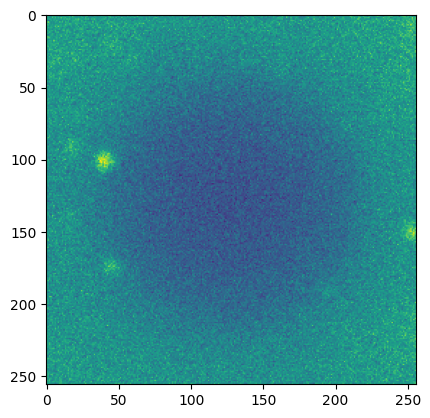

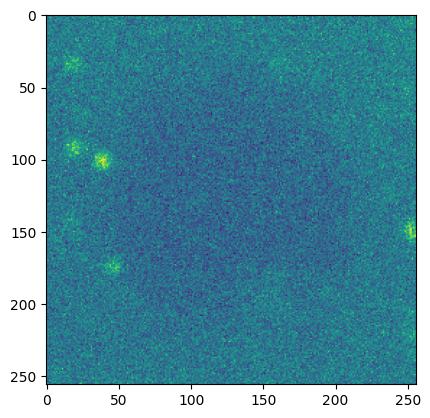

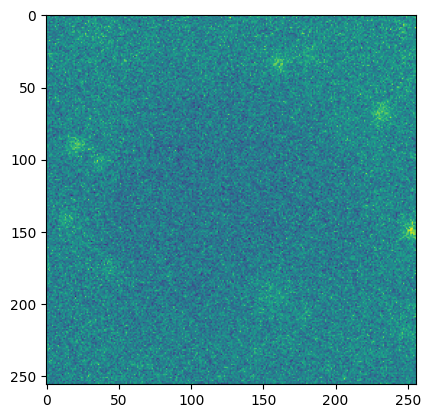

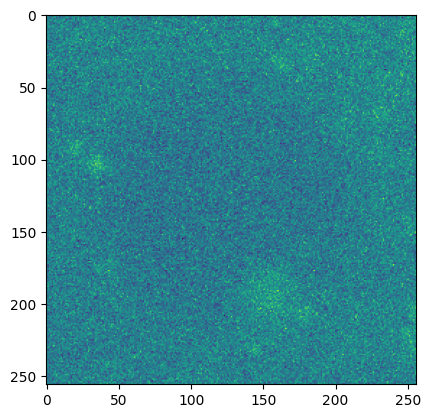

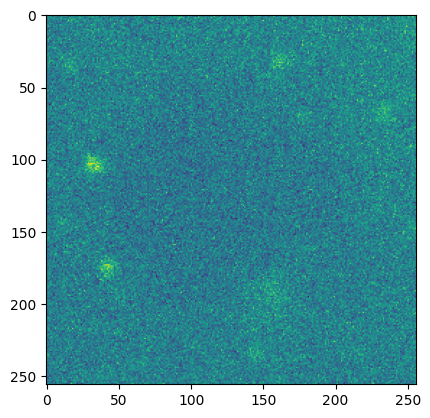

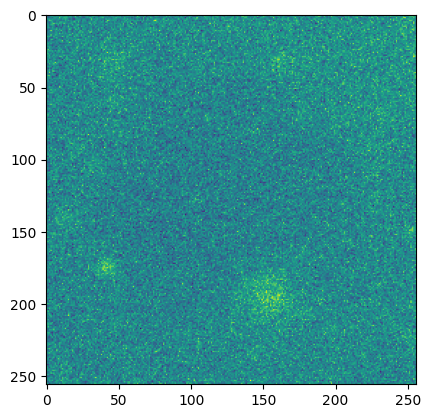

In [50]:
img0 = cv2.imread(f'decomposed/decomp0.tif')
img_gray0 = cv2.cvtColor(img0, cv2.COLOR_RGB2GRAY)

img179 = cv2.imread(f'decomposed/decomp179.tif')
img_gray179 = cv2.cvtColor(img179, cv2.COLOR_RGB2GRAY)

for frame in range(0,180,30):
    img = cv2.imread(f'decomposed/decomp{frame}.tif')
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    test = img_gray - np.mean(img_gray179)
    plt.imshow(test)
    plt.show()

(256, 256)


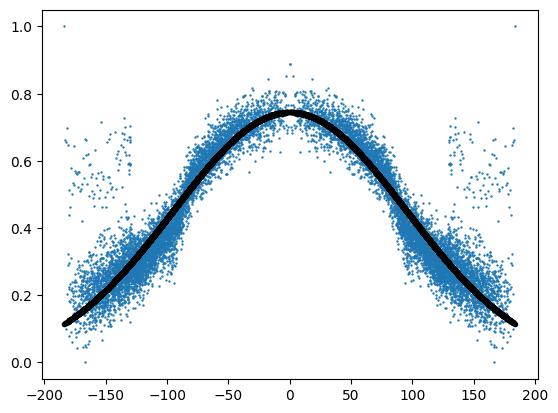

In [52]:
# Set Gaussian parameters for first frame to prevent false fitting

img = cv2.imread(f'decomposed/decomp0.tif')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
radii, brightness = radial_brightness_distribution(img_gray, center_point)
mirrored_x_data = np.concatenate((-np.flip(radii), radii))
mirrored_y_data = np.concatenate((np.flip(brightness), brightness))
normalized_array = 1- (mirrored_y_data- np.min(mirrored_y_data)) / (np.max(mirrored_y_data) - np.min(mirrored_y_data))

# Fitting without initial guess

fit_params, _ = curve_fit(gaussian, mirrored_x_data, normalized_array)

plt.scatter(mirrored_x_data, normalized_array , label=f'Initial Data', s=0.5)
plt.plot(mirrored_x_data, gaussian(mirrored_x_data, *fit_params), 'k.', label='Gaussian Fit')
plt.show()

initial_guess = fit_params

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

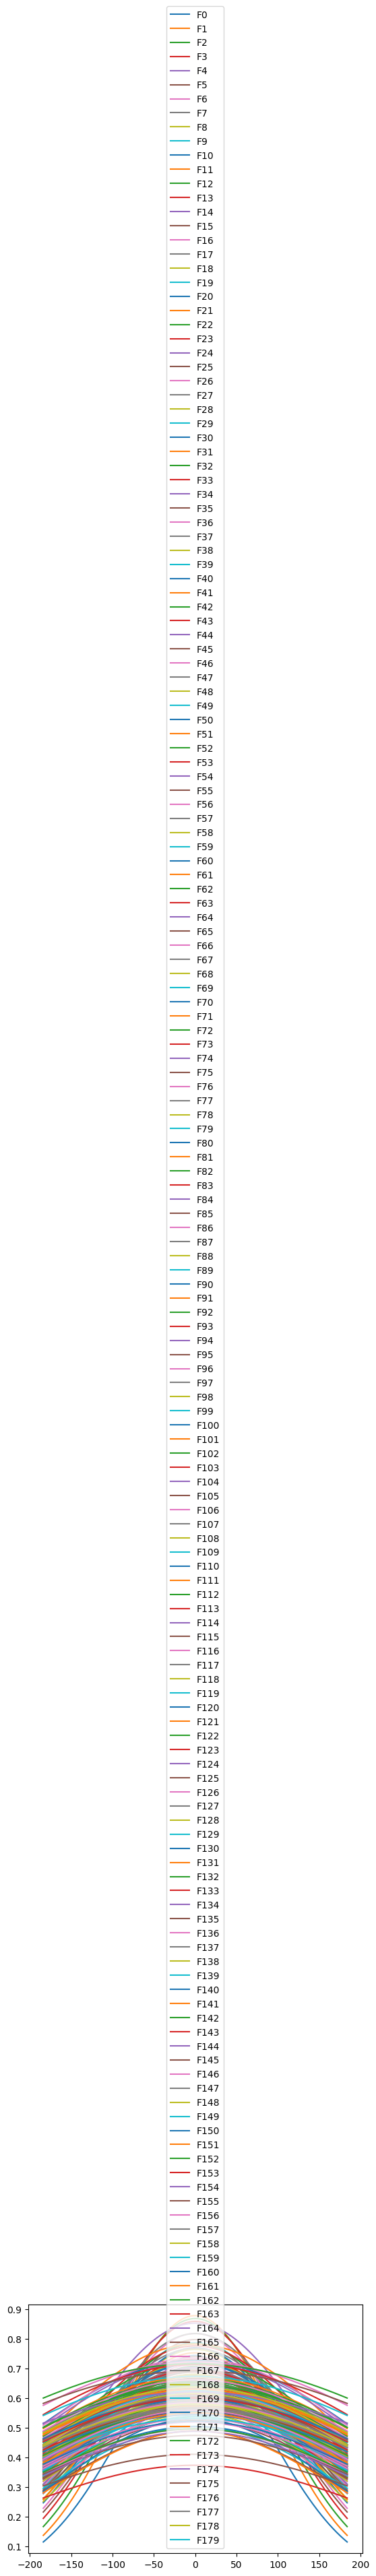

In [68]:
indices, sigma, A = [],[],[]

mean_list, shift_list = [],[]

for frame in range(0,180,1):
    dataset = {'Frame': [], 'ImageRGB': [], 'ImageBW': []}
    img = cv2.imread(f'decomposed/decomp{frame}.tif')
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    dataset['Frame'] = frame
    dataset['ImageRGB'] = img
    dataset['ImageBW'] = img_gray

    radii, brightness = radial_brightness_distribution(img_gray, center_point)
    mirrored_x_data = np.concatenate((-np.flip(radii), radii))
    mirrored_y_data = np.concatenate((np.flip(brightness), brightness))
    normalized_array = 1- (mirrored_y_data- np.min(mirrored_y_data)) / (np.max(mirrored_y_data) - np.min(mirrored_y_data))
    fit_params, _ = curve_fit(gaussian, mirrored_x_data, normalized_array, p0=initial_guess)

    plt.plot(mirrored_x_data, gaussian(mirrored_x_data,*fit_params), label=f'F{frame}')
    #plt.plot(mirrored_x_data, gaussian(mirrored_x_data, *fit_params), label=f'Fitted Gaussian {frame}')
    #plt.show()
    
    amplitude, mean, stddev = fit_params

    indices.append(frame)
    sigma.append(stddev)
    A.append(amplitude)

indices = np.array(indices)
sigma = np.array(sigma)
A = np.array(A)
plt.legend()
plt.show()

[ 95.15562252  95.44399094 101.22260891 106.68679626 134.08724396
 113.75529386 115.14166619 125.51447735 125.20832363 131.38341555
 121.9499351  125.70775255 134.40309311 152.34355798 135.46499223
 134.4923714  143.44769448 142.45767991 133.27249825 165.03198486
 154.93570098 183.91017714 134.62546342 152.08844601 143.68394853
 141.3148013  144.79878719 179.45534963 164.27793522 153.34592852
 169.36721061 157.35022671 185.08588055 162.60759658 166.17565634
 167.48698232 154.09339843 163.39565051 158.34828571 162.03529255
 220.3466277  160.16242326 191.17879326 181.54547019 183.74112147
 178.15236954 214.39790852 170.88874059 205.21848401 181.43058382
 209.10825557 173.12840676 177.52777901 172.35939357 214.92922211
 168.23250962 171.59791055 174.3423353  171.40959899 178.19365943
 217.94516223 186.94458095 205.2562293  188.49060241 169.37399007
 184.77136361 180.43248279 188.50559682 186.20207544 176.34885228
 165.05247581 174.77618129 200.74520558 174.25650452 189.2154467
 192.042093

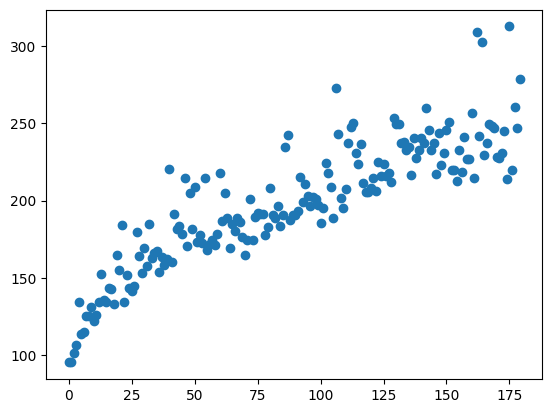

In [69]:
print(sigma)
plt.scatter(indices, sigma)
plt.show()
#plt.plot(indices, A)

In [87]:
def linear_function(x, m, b):
    return m * x + b

def FindRoot(m,b):
    return -b/m

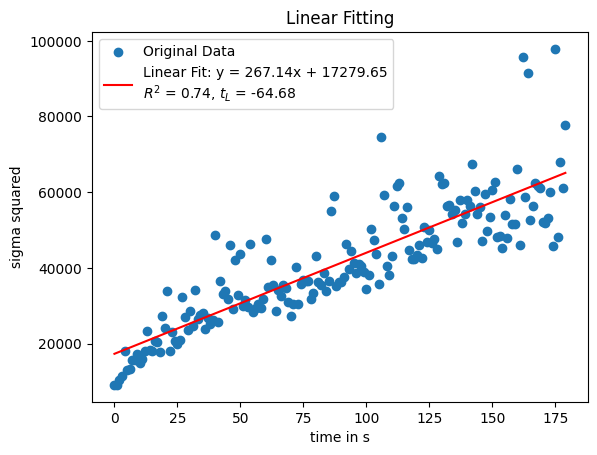

In [91]:
params, covariance = curve_fit(linear_function, indices, sigma ** 2)
m, b = params
y_fit = linear_function(indices, m, b)
residuals = sigma ** 2 - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((sigma ** 2 - np.mean(sigma ** 2))**2)
r_squared = 1 - (ss_res / ss_tot)
plt.scatter(indices, sigma ** 2, label='Original Data')
plt.plot(indices, y_fit, label=f'Linear Fit: y = {m:.2f}x + {b:.2f}\n$R^2$ = {r_squared:.2f}, $t_L$ = {FindRoot(m,b):.2f}', color='red')
plt.legend()
plt.xlabel('time in s')
plt.ylabel('sigma squared')
plt.title('Linear Fitting')
plt.show()

C:\Users\morit\AppData\Local\Temp\ipykernel_5544\1370283560.py:1: RuntimeWarning: divide by zero encountered in log
  log_indices = np.log(indices)


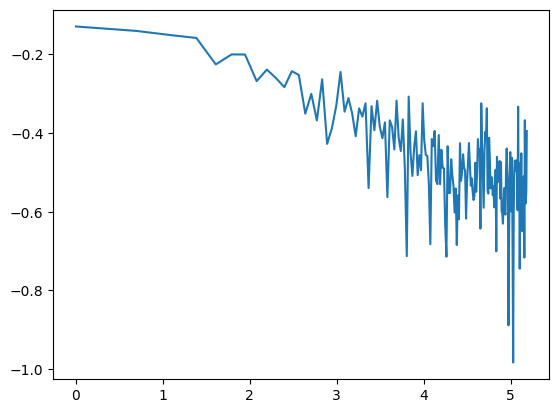

In [92]:
log_indices = np.log(indices)
log_A = np.log(A)
nan_indices = np.isinf(log_indices)
log_indices = log_indices[~nan_indices]
log_A = log_A[~nan_indices]
plt.plot(log_indices, log_A)

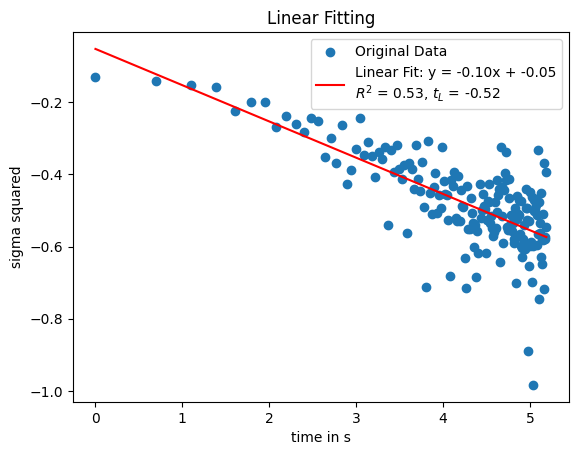

In [93]:
params, covariance = curve_fit(linear_function, log_indices, log_A)
m, b = params
y_fit = linear_function(log_indices, m, b)
residuals = log_A - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((log_A - np.mean(log_A))**2)
r_squared = 1 - (ss_res / ss_tot)
plt.scatter(log_indices, log_A, label='Original Data')
plt.plot(log_indices, y_fit, label=f'Linear Fit: y = {m:.2f}x + {b:.2f}\n$R^2$ = {r_squared:.2f}, $t_L$ = {FindRoot(m,b):.2f}', color='red')
plt.legend()
plt.xlabel('time in s')
plt.ylabel('sigma squared')
plt.title('Linear Fitting')
plt.show()

[110 128  99]
[130 138  99]
[160 134  95]
[130 172  80]
[174 162  80]
[152  86  77]
[182 106  70]
[ 90 180  70]
[138 110  72]
[108 168  70]
[184 196  60]
[ 86 112  66]
[178  66  62]
[ 76 158  62]
[ 62 184  62]
[194 142  58]
[  2 134  99]
[160 106  60]
[124  68  56]
[102  86  56]
[ 70 132  54]
[122 200  55]
[200  64  55]
[146 200  54]
[58 62 48]
[102  50  50]
[152  62  50]
[ 72 202  52]
[ 58 114  48]
[208 198  48]
[150 154  50]
[202 108  48]
[56 82 48]
[158 178  50]
[206  86  46]
[208 176  46]
[116 102  48]
[206  40  40]
[78 78 44]
[162 214  44]
[72 46 46]
[ 48 210  43]
[130 254  77]
[ 42 126  44]
[182  42  43]
[120  40  40]
[ 42 168  40]
[210 156  41]
[162  38  38]
[194 216  38]
[ 42 100  40]
[ 88 216  38]
[ 98 150  38]
[38 68 38]
[216 136  37]
[40 40 33]
[124 222  34]
[256  70  62]
[140  42  29]
[ 6 54 52]
[90 32 29]
[228  30  25]
[226  64  30]
[224 226  29]
[252 146  50]
[178  86  29]
[62 26 27]
[256 198  50]
[ 24 220  29]
[228 168  24]
[144 220  24]
[134   2  48]
[196   2  44]
[ 66 

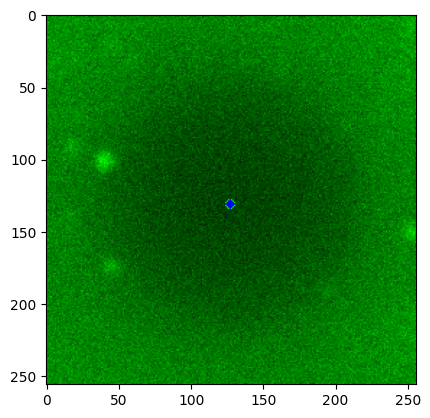

127 131


In [8]:
# Automatic Circle Detection for 2D diffusion
# Read the original image
img = cv2.imread('frame1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread('frame4.png')
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

img3 = cv2.imread('frame8.png')
img3_gray = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)

img4 = cv2.imread('frame12.png')
img4_gray = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(img_gray, (3, 3))

a_avg, b_avg, r_avg = [], [], []
# Apply Hough transform on the gray image.
detected_circles = cv2.HoughCircles(img_gray,
				cv2.HOUGH_GRADIENT, 1, 20, param1 = 10,
			param2 = 10, minRadius = 10, maxRadius = 100)
# Draw circles that are detected.
if detected_circles is not None:

	# Convert the circle parameters a, b and r to integers.
	detected_circles = np.uint16(np.around(detected_circles))

	for pt in detected_circles[0, :]:

	 	print(pt)
	 	a_avg.append(pt[0])
	 	b_avg.append(pt[1])
	 	r_avg.append([2])

a = int(np.average(a_avg))
b = int(np.average(b_avg))
r = int(np.average(r_avg))

cv2.circle(img, (a, b), r, (0, 255, 0), 2)
cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
plt.imshow(img)
plt.show()
print(a,b)

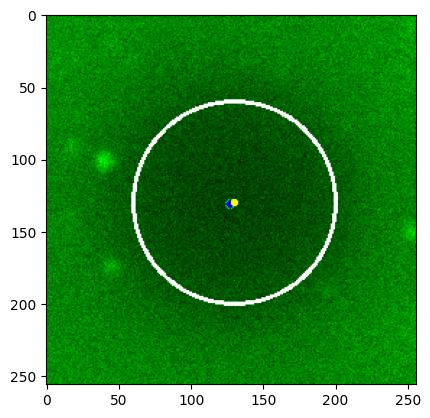

In [6]:
# Manual Detection
x,y = 130,130
rm = 70
cv2.circle(img, (x, y), rm, (255, 255, 255), 2)
cv2.circle(img, (x, y), 1, (255, 255, 0), 2)
plt.imshow(img)
plt.show()

In [5]:
# Calculate radial brightness distribution
radii, brightness = radial_brightness_distribution(img_gray, center_point)
radii2, brightness2 = radial_brightness_distribution(img2_gray, center_point)
radii3, brightness3 = radial_brightness_distribution(img3_gray, center_point)
radii4, brightness4 = radial_brightness_distribution(img4_gray, center_point)


# Plot the radial brightness distribution
plt.scatter(radii, brightness, color='b', s=1, norm=True)
plt.scatter(radii2, brightness2,color='r', s=0.5, norm=True)
plt.scatter(radii3, brightness3,color='g', s=0.5, norm=True)
plt.scatter(radii4, brightness4,color='y', s=0.5, norm=True)

plt.title('Radial Brightness Distribution')
plt.xlabel('Radius from Center')
plt.ylabel('Mean Brightness')
plt.show()

(256, 256)


NameError: name 'img2_gray' is not defined

In [14]:
# Mirror the data
mirrored_x_data = np.concatenate((-np.flip(radii), radii))
mirrored_y_data = np.concatenate((np.flip(brightness), brightness))
normalized_array = (mirrored_y_data- np.min(mirrored_y_data)) / (np.max(mirrored_y_data) - np.min(mirrored_y_data))

mirrored_x_data2 = np.concatenate((-np.flip(radii2), radii2))
mirrored_y_data2 = np.concatenate((np.flip(brightness2), brightness2))
normalized_array2 = (mirrored_y_data2- np.min(mirrored_y_data2)) / (np.max(mirrored_y_data2) - np.min(mirrored_y_data2))

mirrored_x_data3 = np.concatenate((-np.flip(radii3), radii3))
mirrored_y_data3 = np.concatenate((np.flip(brightness3), brightness3))
normalized_array3 = (mirrored_y_data3- np.min(mirrored_y_data3)) / (np.max(mirrored_y_data3) - np.min(mirrored_y_data3))

mirrored_x_data4 = np.concatenate((-np.flip(radii4), radii4))
mirrored_y_data4 = np.concatenate((np.flip(brightness4), brightness4))
normalized_array4 = (mirrored_y_data4- np.min(mirrored_y_data4)) / (np.max(mirrored_y_data4) - np.min(mirrored_y_data4))

In [7]:
_data = mirrored_x_data
y_data = normalized_array


# Plot the data and the fitted Gaussian distribution
plt.scatter(mirrored_x_data, normalized_array, label='F1', s=0.5)
#plt.scatter(mirrored_x_data2, normalized_array2, label='F4', s=0.5)
#plt.scatter(mirrored_x_data3, normalized_array3, label='F8', s=0.5)
#plt.scatter(mirrored_x_data4, normalized_array4, label='F12', s=0.5)

plt.plot(mirrored_x_data, gaussian(mirrored_x_data, *fit_params), 'r--', label='Fitted Gaussian F1',)
#plt.plot(mirrored_x_data2, gaussian(mirrored_x_data2, *fit_params), label='Fitted Gaussian F4')
#plt.plot(mirrored_x_data3, gaussian(mirrored_x_data3, *fit_params), label='Fitted Gaussian F8')
#plt.plot(mirrored_x_data4, gaussian(mirrored_x_data4, *fit_params), label='Fitted Gaussian F12')

plt.title('Fit data to Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Display fitted parameters
amplitude, mean, stddev, shift = fit_params
print(f"Amplitude: {amplitude:.3f}")
print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {stddev:.3f}")

NameError: name 'x_data' is not defined

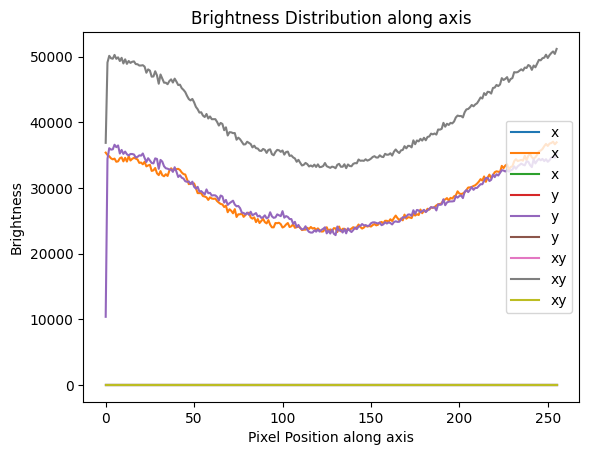

In [95]:
def brightness_distribution_along_axis(image, axis):

    # Sum pixel values along the specified axis
    brightness_distribution = np.sum(image, axis=axis)

    return brightness_distribution

# Load an image (replace 'your_image.jpg' with the actual image file)
image = cv2.imread('frame1.png')
if image is None:
    print("Error: Could not read the image.")
    exit()

# Calculate brightness distribution along the x-axis
brightness_along_x = brightness_distribution_along_axis(image, axis=0)
brightness_along_y = brightness_distribution_along_axis(image, axis=1)

xy_sum = np.sqrt(brightness_along_x ** 2 + brightness_along_y ** 2)

# Plot the brightness distribution
plt.plot(brightness_along_x, label='x')
plt.plot(brightness_along_y, label='y')
plt.plot(xy_sum, label='xy')
plt.title('Brightness Distribution along axis')
plt.xlabel('Pixel Position along axis')
plt.legend()
plt.ylabel('Brightness')
plt.show()

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175


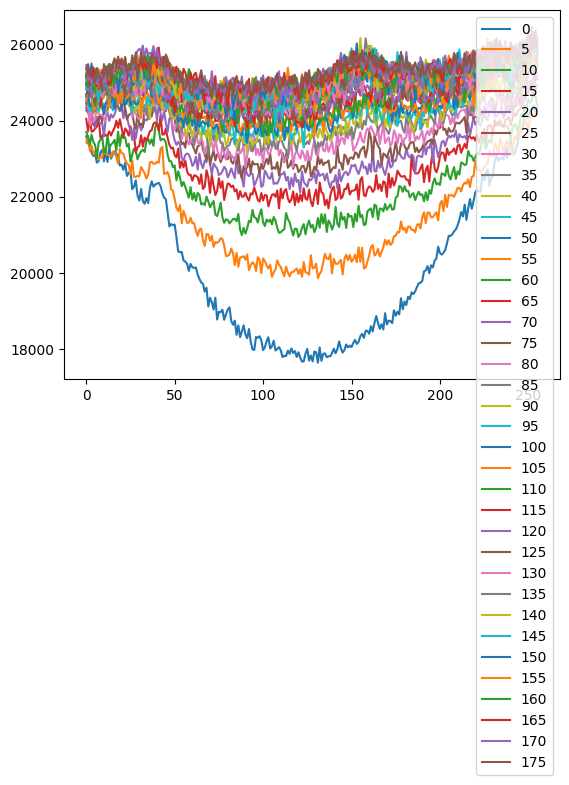

In [96]:
indices, sigma, A = [], [] ,[]

for frame in range(0,180,5):
    print(frame)
    dataset = {'Frame': [], 'ImageRGB': [], 'ImageBW': []}
    img = cv2.imread(f'decomposed/decomp{frame}.tif')
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    dataset['Frame'] = frame
    dataset['ImageRGB'] = img
    dataset['ImageBW'] = img_gray

    brightness_along_x = brightness_distribution_along_axis(img_gray, axis=0)

    plt.plot(brightness_along_x, label=f'{frame}')

    
plt.legend()
plt.show()